In [36]:
from tensorflow.keras.models import load_model
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

SEQ_LEN=60
# DO_PLOT=False
DO_PLOT=True

In [37]:
model=load_model("./models/PRED-1592152010_model.h5")

# print(model)
url = "./datasets/DAT_ASCII_EURUSD_M1_2017.csv"
df = pd.read_csv(url, names=list(["date","open", "high", "low", "close", "volume"]), header=None, sep=";")
df.drop("volume", 1, inplace=True)
df['date'] = pd.to_datetime(df['date'], infer_datetime_format=True)
df.set_index('date', inplace=True)

df.head()

,open,high,low,close
date,,,,
2018-01-01 17:00:00,1.20037,1.20100,1.20037,1.20100
2018-01-01 17:01:00,1.20083,1.20095,1.20017,1.20030
2018-01-01 17:02:00,1.20035,1.20043,1.20035,1.20043
2018-01-01 17:03:00,1.20041,1.20050,1.20031,1.20046
2018-01-01 17:04:00,1.20049,1.20049,1.20046,1.20048


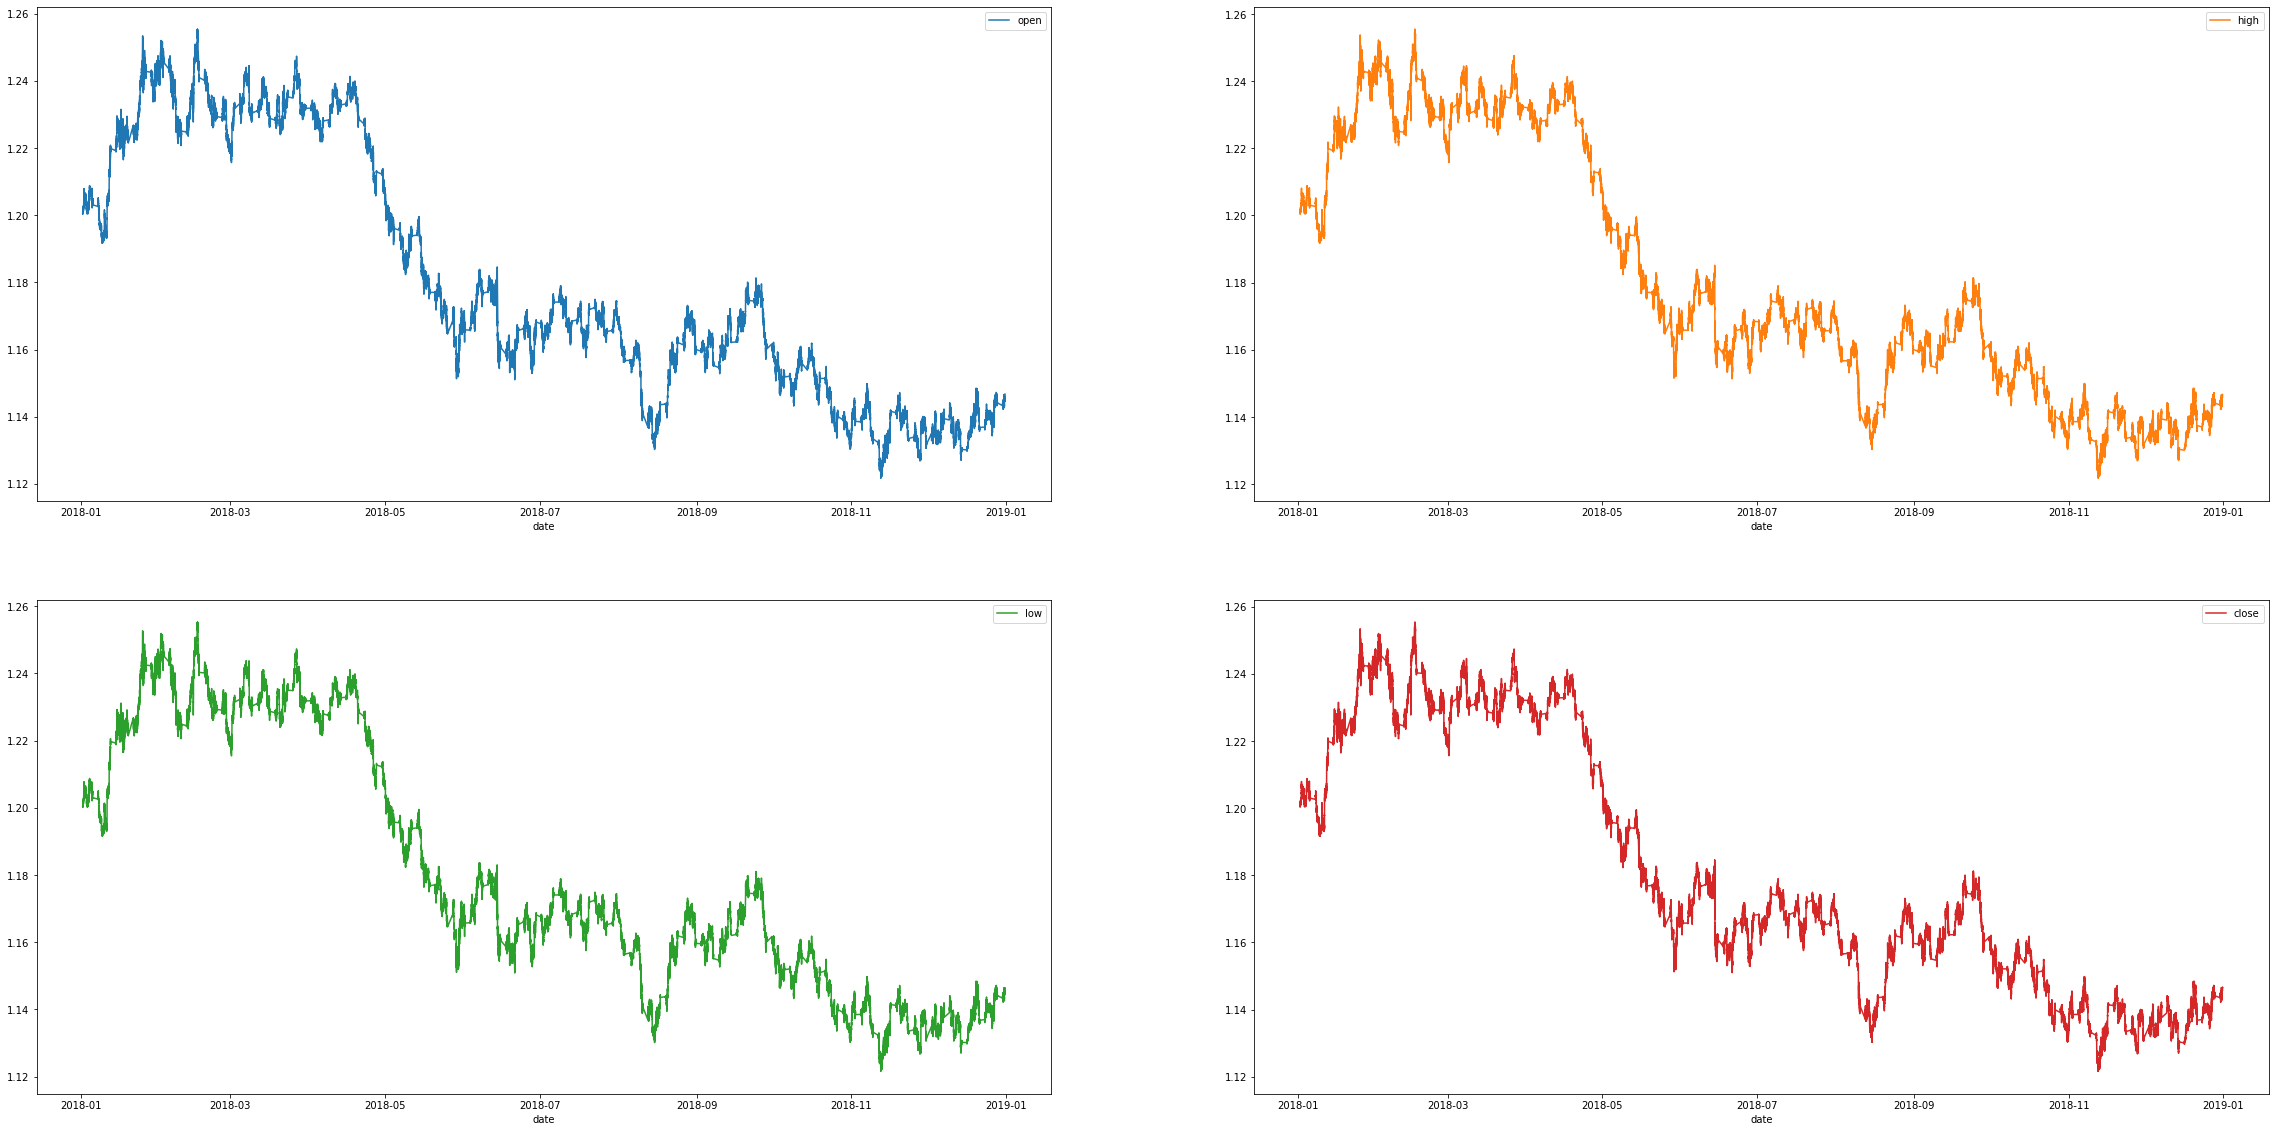

In [38]:
 if DO_PLOT:
     df.plot(subplots=True, layout=(2, 2), figsize=(40, 20), sharex=False)

In [39]:
data_set = df.iloc[:, 3].values #close
print(data_set)

[1.201   1.2003  1.20043 ... 1.14645 1.14672 1.14644]


In [40]:
sc = MinMaxScaler(feature_range=(0,1))
data_set_scaled = sc.fit_transform(data_set.reshape(-1,1))

In [41]:
print(data_set_scaled.reshape(1, -1)[0])

[0.59328749 0.58805502 0.58902676 ... 0.18552848 0.18754672 0.18545373]


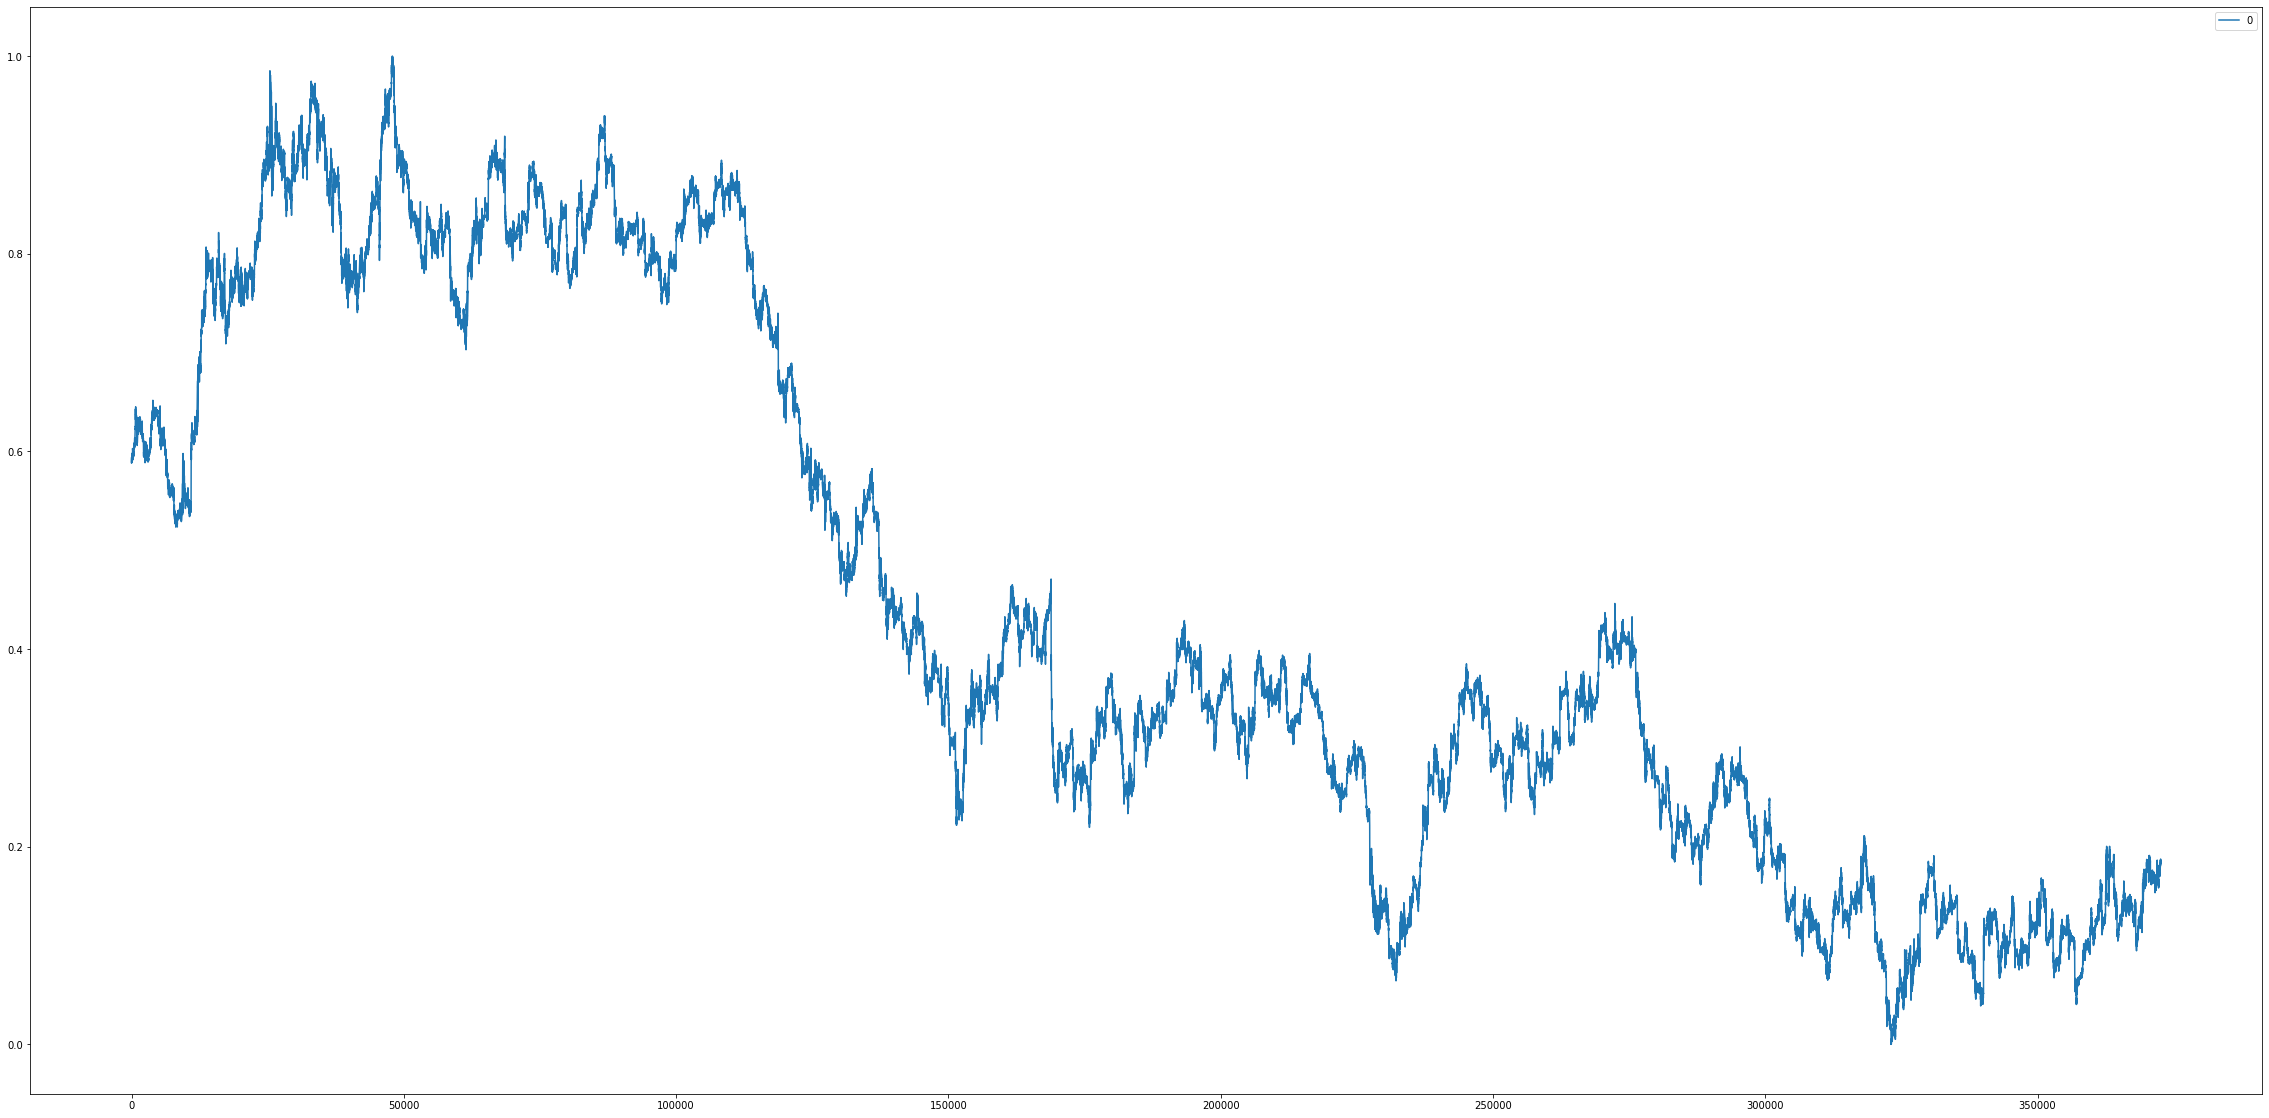

In [42]:
if DO_PLOT:
    pd.DataFrame(data=data_set_scaled.reshape(1, -1)[0]).plot(figsize=(40, 20), )

In [24]:
to_predict=data_set_scaled[:60]

chain_predict = np.array([to_predict])

output=[]

for i in range(SEQ_LEN,3500):
    if i%300==0:
        print(i)
    pred_val=model.predict(chain_predict)
    output.append(pred_val)

    stitched=np.concatenate((np.array(chain_predict[0][1:]),np.array(pred_val)))
    chain_predict=np.array([stitched])

300
600
900
1200
1500
1800
2100
2400
2700
3000
3300


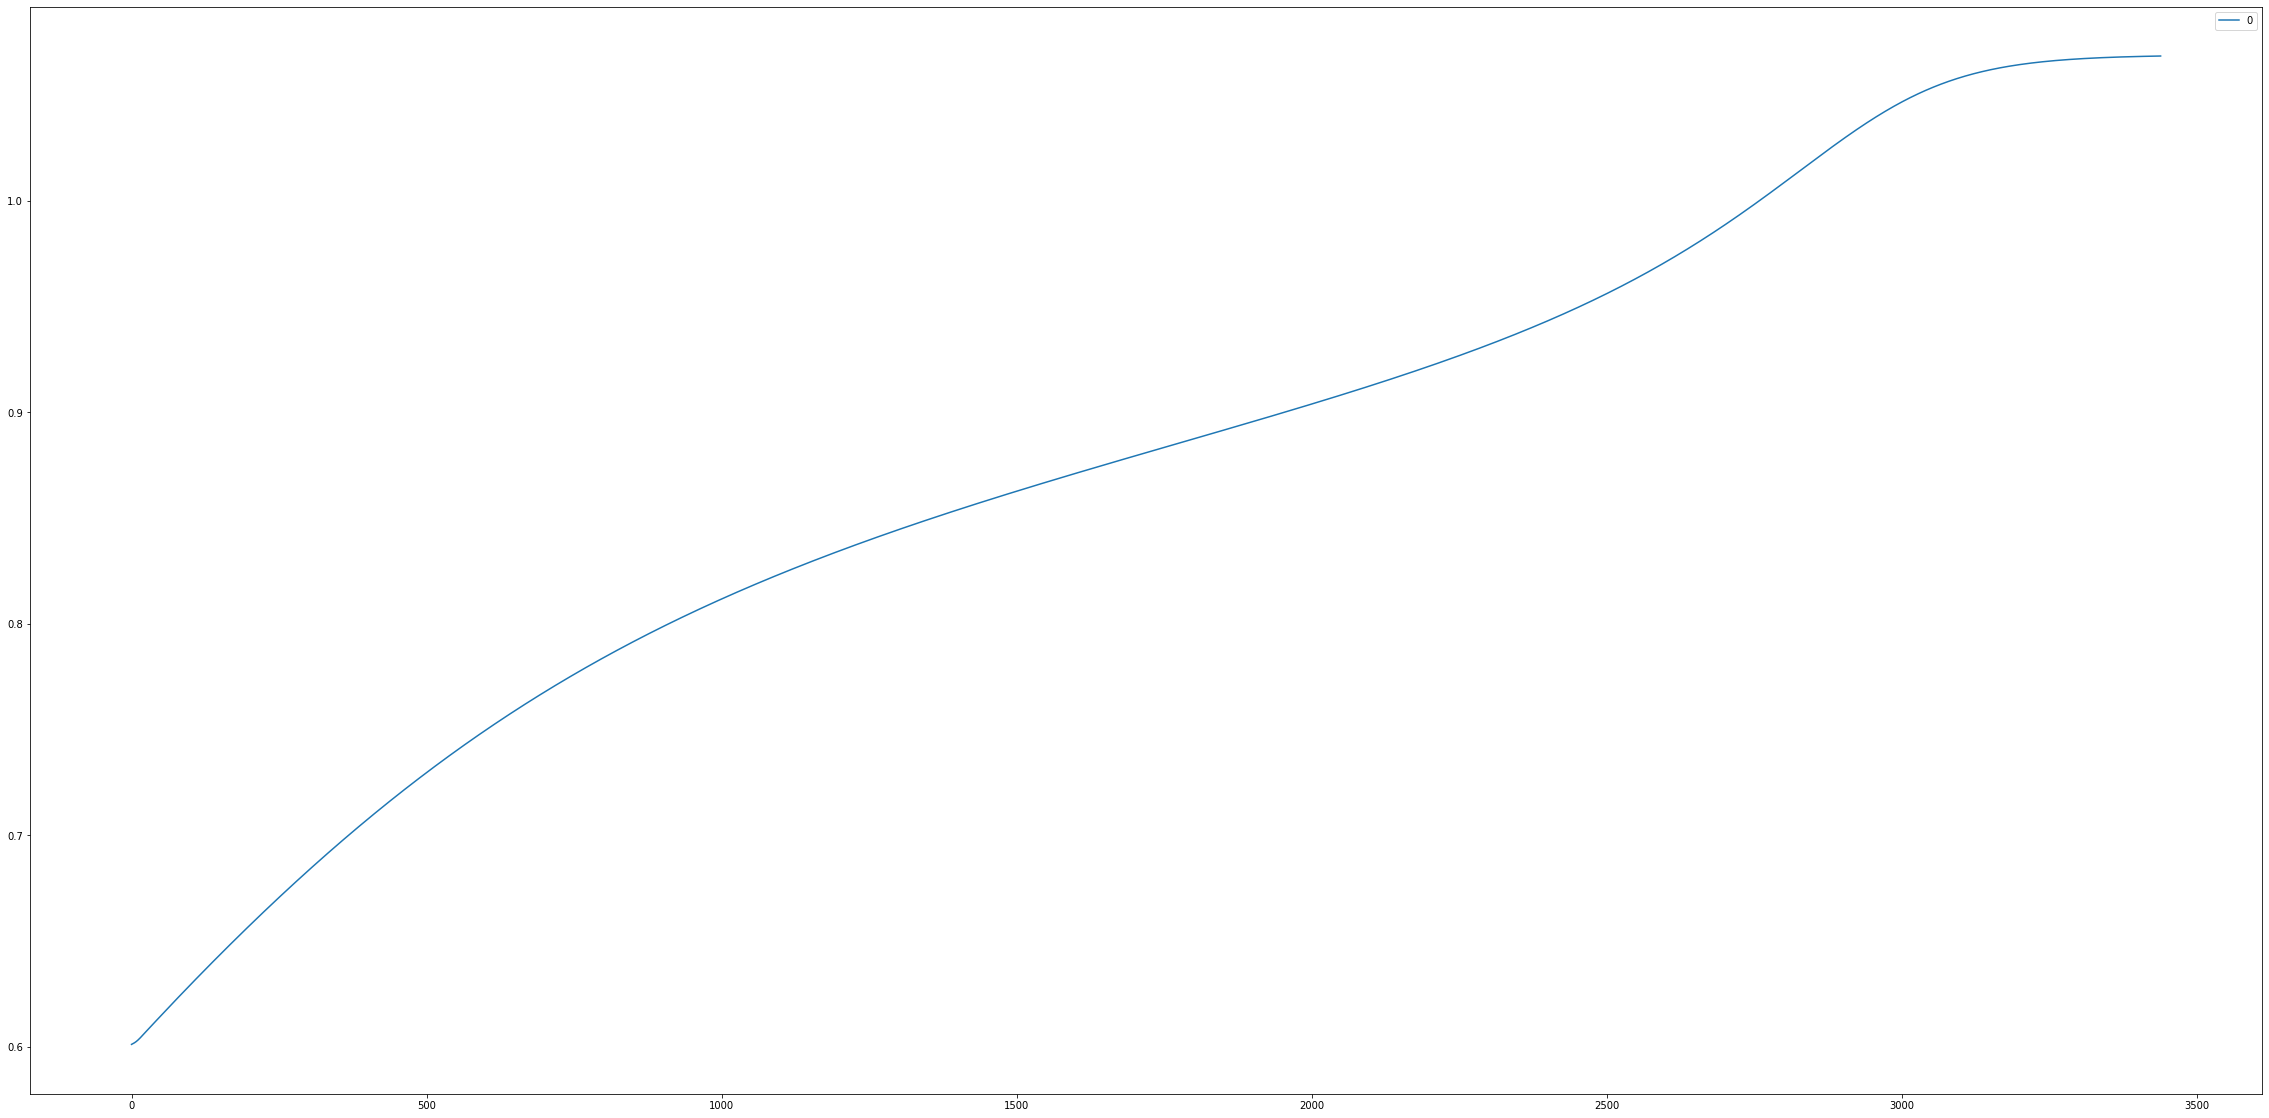

In [35]:

npoutput=np.array(output).reshape(1,-1)[0]


pd.DataFrame(data=npoutput).plot(figsize=(40, 20), )